In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
import xgboost as xgb

In [3]:
dados = pd.read_csv('TRAIN.csv')

In [4]:
dados.head()

,AT,V,AP,RH,PE
0,22.85,60.29,1017.29,61.92,448.58
1,11.75,35.76,1018.99,57.92,473.01
2,12.24,44.90,1020.31,82.22,464.25
3,13.43,40.10,1015.82,87.90,471.77
4,4.65,35.19,1018.23,94.78,489.36


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      8000 non-null   float64
 1   V       8000 non-null   float64
 2   AP      8000 non-null   float64
 3   RH      8000 non-null   float64
 4   PE      8000 non-null   float64
dtypes: float64(5)
memory usage: 312.6 KB


In [6]:
dados.describe()

,AT,V,AP,RH,PE
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,19.677299,54.302629,1013.235534,73.260477,454.310364
std,7.448395,12.687358,5.920858,14.588452,17.056199
min,2.340000,25.360000,993.110000,25.560000,420.260000
25%,13.510000,41.740000,1009.070000,63.340000,439.727500
50%,20.320000,52.080000,1012.950000,74.880000,451.495000
75%,25.770000,66.540000,1017.190000,84.700000,468.400000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [7]:
dados.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.843584,-0.505347,-0.538296,-0.947350
V,0.843584,1.000000,-0.409484,-0.308251,-0.869313
AP,-0.505347,-0.409484,1.000000,0.100138,0.515031
RH,-0.538296,-0.308251,0.100138,1.000000,0.385353
PE,-0.947350,-0.869313,0.515031,0.385353,1.000000


In [8]:
dados.columns = ['temperatura','vacuo_exaustao','pressao','umidade_relativa','producao_energia']

In [9]:
dados.head()

,temperatura,vacuo_exaustao,pressao,umidade_relativa,producao_energia
0,22.85,60.29,1017.29,61.92,448.58
1,11.75,35.76,1018.99,57.92,473.01
2,12.24,44.90,1020.31,82.22,464.25
3,13.43,40.10,1015.82,87.90,471.77
4,4.65,35.19,1018.23,94.78,489.36


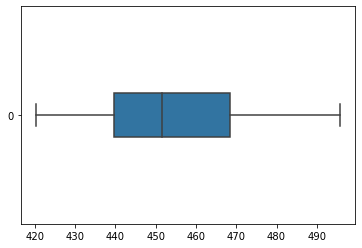

In [10]:
ax = sns.boxplot(data=dados['producao_energia'], orient='h', width=0.2)

C:\Users\Qorpo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='producao_energia', ylabel='Produção de Energia'>

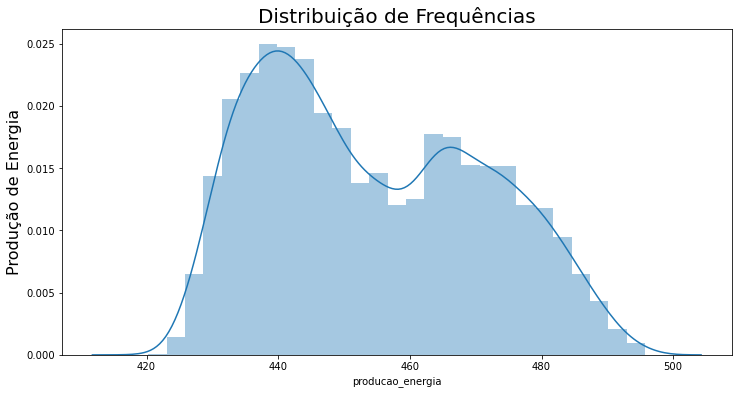

In [11]:
ax = sns.distplot(dados['producao_energia'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Produção de Energia', fontsize=16)
ax

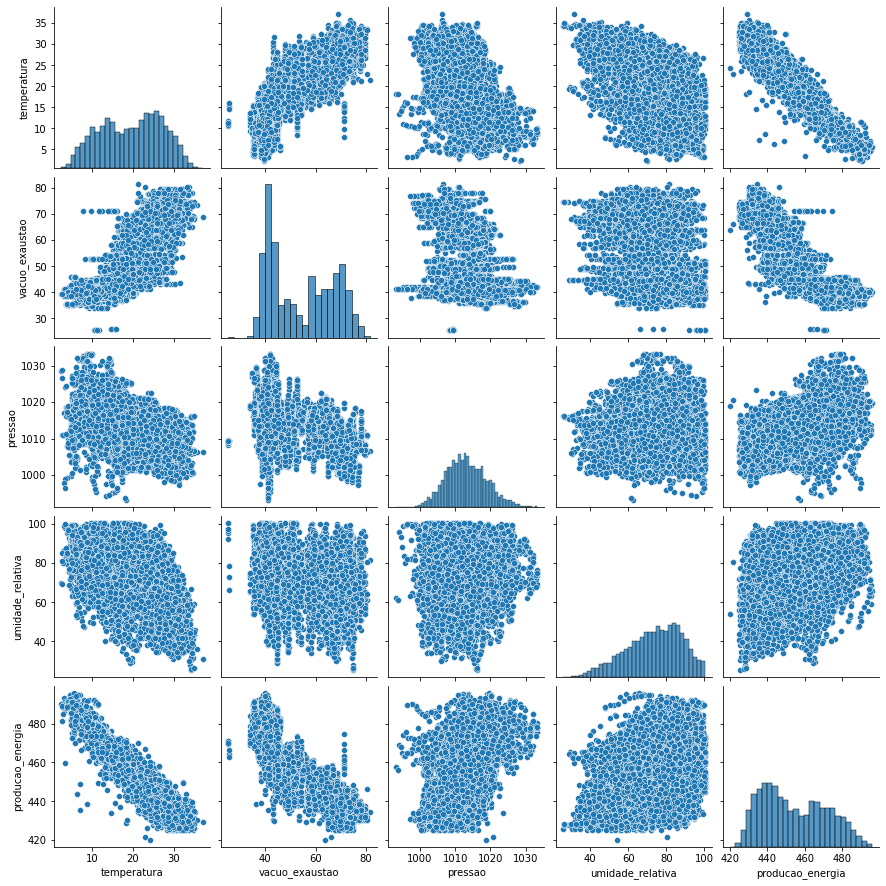

In [12]:
ax = sns.pairplot(data = dados)

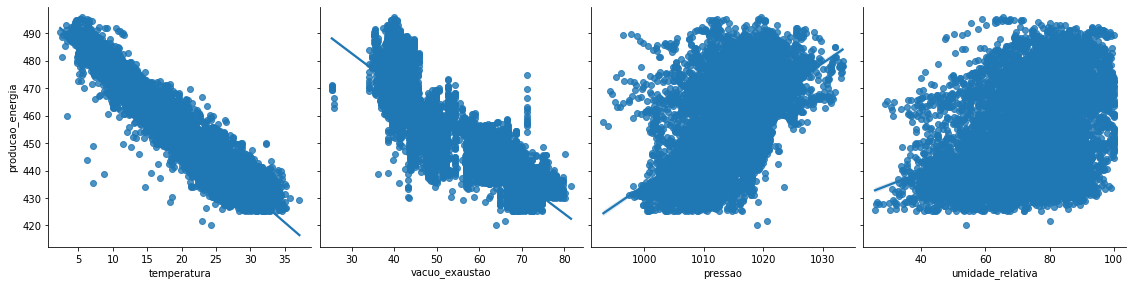

In [13]:
ax = sns.pairplot(data = dados, y_vars = 'producao_energia', x_vars = ['temperatura', 'vacuo_exaustao', 'pressao', 'umidade_relativa'], kind = 'reg', height = 4)

In [14]:
X = dados.drop('producao_energia', axis = 1)

In [15]:
y= dados['producao_energia']

In [16]:
X.head()

,temperatura,vacuo_exaustao,pressao,umidade_relativa
0,22.85,60.29,1017.29,61.92
1,11.75,35.76,1018.99,57.92
2,12.24,44.90,1020.31,82.22
3,13.43,40.10,1015.82,87.90
4,4.65,35.19,1018.23,94.78


In [17]:
y.head()

0    448.58
1    473.01
2    464.25
3    471.77
4    489.36
Name: producao_energia, dtype: float64

In [18]:
modelo = LinearRegression()

In [19]:
SEED = 1841

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [20]:
modelo.fit(X_train, y_train)

LinearRegression()

In [21]:
y_previsto = modelo.predict(X_test)

In [22]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.93
R² = 0.93


In [23]:
entrada = X_test[1:2]
entrada

,temperatura,vacuo_exaustao,pressao,umidade_relativa
1099,14.24,41.16,1010.16,87.0


In [24]:
modelo.predict(entrada)[0]

465.71926297854975

In [25]:
modelo.coef_

array([-1.96432262, -0.2385142 ,  0.06005876, -0.15911715])

In [26]:
index=['Intercepto', 'Temperatura', 'Vácuo Exaustão', 'Pressão', 'Umidade Relativa']

In [27]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,456.682695
Temperatura,-1.964323
Vácuo Exaustão,-0.238514
Pressão,0.060059
Umidade Relativa,-0.159117


In [28]:
y_previsto_train = modelo.predict(X_train)

<AxesSubplot:title={'center':'Previsão X Real'}, xlabel='Produção de Energia - Previsão', ylabel='Produção de Energia - Real'>

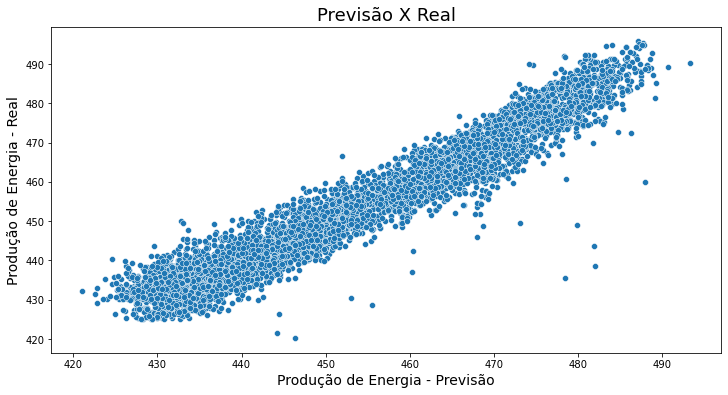

In [29]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Produção de Energia - Previsão', fontsize=14)
ax.set_ylabel('Produção de Energia - Real', fontsize=14)
ax

In [30]:
residuo = y_train - y_previsto_train

<AxesSubplot:title={'center':'Resíduos X Previsão'}, xlabel='Produção de Energia - Previsão', ylabel='Resíduos'>

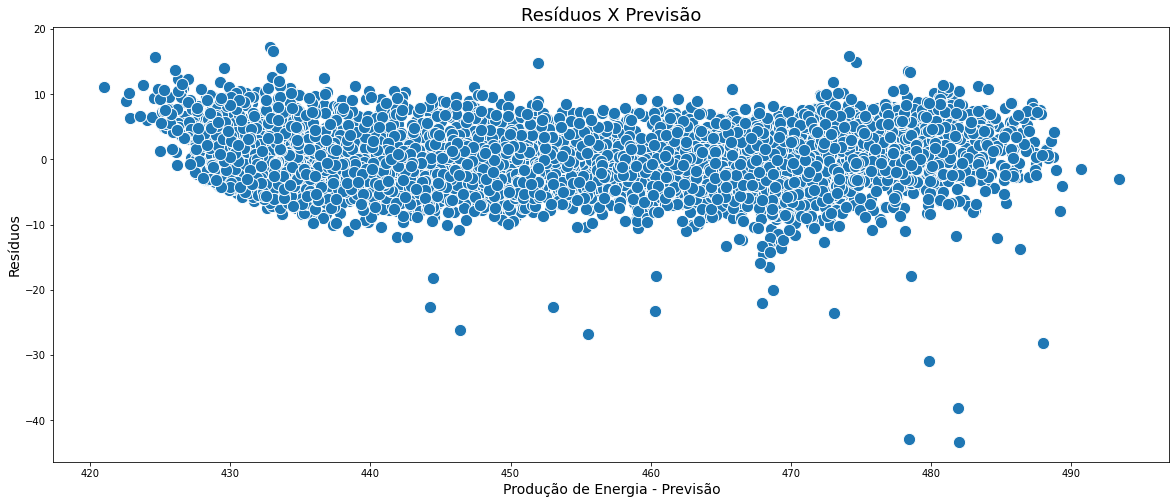

In [31]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Produção de Energia - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

<AxesSubplot:title={'center':'Resíduos X Previsão'}, xlabel='Produção de Energia - Previsão', ylabel='Resíduos²'>

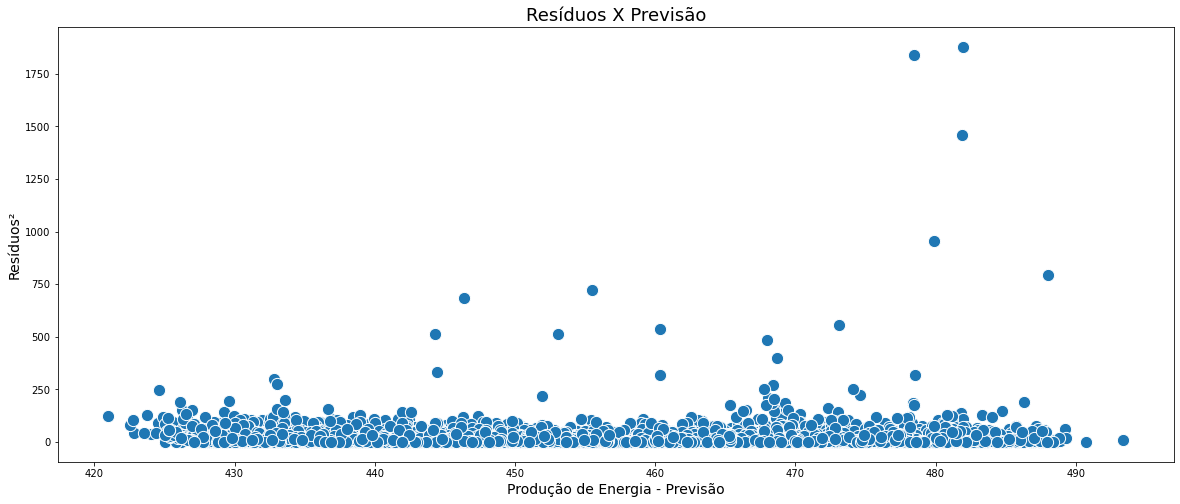

In [32]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Produção de Energia - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

In [33]:
SEED = 1841

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [34]:
xgbr = xgb.XGBRegressor(verbosity=0)

In [35]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [37]:
score  = xgbr.score(X_train, y_train)
print("Score: ", score)

Score:  0.9878423540647966


In [53]:
scores = cross_val_score(xgbr, X_train, y_train, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.96


In [43]:
ypred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 10.40
RMSE: 3.23


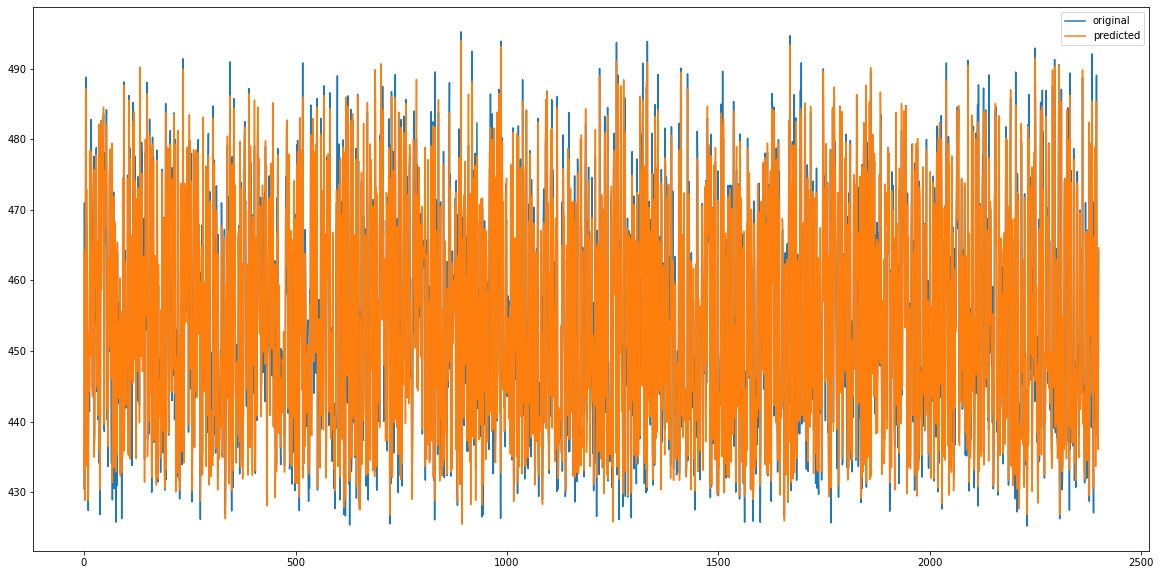

In [51]:
x_ax = range(len(y_test))
plt.figure(figsize=(20, 10))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.legend()
plt.show()